## 1. import libraries

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


## 2. Load the dataset

In [7]:
df = pd.read_csv("email_classification_dataset.csv")
df.head()

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


## 3. Clean the Email Text

In [8]:
import string
import re

def clean_text(text):
    text = text.lower()  # Make texts lowercase
    text = re.sub(r'\s+', ' ', text)  # remove line breaks and extra spaces
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text.strip()

# Apply cleaning to the email text
df['clean_email'] = df['email'].apply(clean_text)
#Results
df[['email', 'clean_email']].head()

,email,clean_email
0,From: support@legitcompany.com\nSubject: Regar...,from supportlegitcompanycom subject regarding ...
1,From: noreply@softwareupdates.com\nSubject: We...,from noreplysoftwareupdatescom subject weekly ...
2,From: noreply@softwareupdates.com\nSubject: Im...,from noreplysoftwareupdatescom subject importa...
3,From: info@customerservice.co\nSubject: Team S...,from infocustomerserviceco subject team standu...
4,From: info@customerservice.co\nSubject: Team S...,from infocustomerserviceco subject team standu...


##  4. Exploratory Data Analysis(EDA)

label
ham     8500
spam    1500
Name: count, dtype: int64


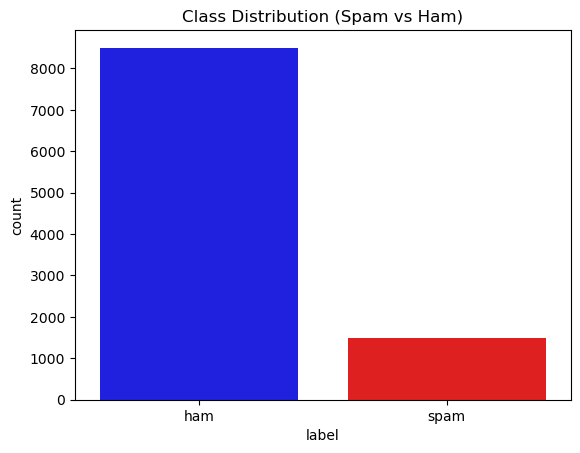

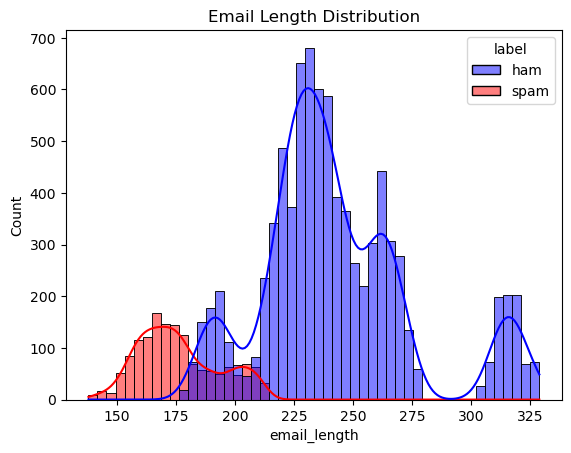

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. See class counts
print(df['label'].value_counts())

# 2. Plot class distribution
sns.countplot(x='label', hue='label', data=df, palette={'ham': 'blue', 'spam': 'red'}, legend=False)
plt.title("Class Distribution (Spam vs Ham)")
plt.show()


# 3. email length
df['email_length'] = df['clean_email'].apply(len)
sns.histplot(data=df, x='email_length', hue='label', bins=50, kde=True, palette={'ham': 'blue', 'spam': 'red'})
plt.title("Email Length Distribution")
plt.show()
